<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/Week_1/Ex3_ANN_Predict_Hourly_Wage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Cho dữ liệu Income_training.csv, hãy xây dựng mô hình dự đoán compositeHourlyWages từ
những thuộc tính còn lại.

* https://www.kaggle.com/c/predict-hourly-wage/data (https://www.kaggle.com/c/predict-hourly-wage/data)

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/all/Income_training.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   compositeHourlyWages  3197 non-null   float64
 1   age                   3197 non-null   int64  
 2   yearsEducation        3197 non-null   int64  
 3   sex1M0F               3197 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 100.0 KB


In [21]:
df.head()

,compositeHourlyWages,age,yearsEducation,sex1M0F
0,21.38,58,10,1
1,25.15,42,16,1
2,8.57,31,12,0
3,12.07,43,13,0
4,10.97,46,12,0


In [22]:
#create a dataframe with all training data except the target column
train_X = df.drop(columns=['compositeHourlyWages'])
#check that the target variable has been removed
train_X.head()

,age,yearsEducation,sex1M0F
0,58,10,1
1,42,16,1
2,31,12,0
3,43,13,0
4,46,12,0


In [23]:
#create a dataframe with only the target column
train_y = df[['compositeHourlyWages']]
#view dataframe
train_y.head()

,compositeHourlyWages
0,21.38
1,25.15
2,8.57
3,12.07
4,10.97


In [24]:
#get number of columns in training data
n_cols = train_X.shape[1]
n_cols

3

In [25]:
#create model
model = Sequential()
#add model layers
model.add(Dense(16, activation='relu', input_shape=(n_cols,))) # (3+1)^2
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu')) # cải tiến bằng cách thử cho học sâu hơn,
model.add(Dense(1))

Tham khảo tại https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37 (https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37)

In [26]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve any
early_stopping_monitor = EarlyStopping(patience=10)
#train model
history = model.fit(train_X, train_y,
epochs=300,
batch_size=32,
validation_split=0.2,
callbacks=[early_stopping_monitor])

Epoch 1/300
80/80 [==============================] - 1s 4ms/step - loss: 85.3723 - val_loss: 53.6423
Epoch 2/300
80/80 [==============================] - 0s 2ms/step - loss: 52.2293 - val_loss: 43.1465
Epoch 3/300
80/80 [==============================] - 0s 2ms/step - loss: 47.5473 - val_loss: 42.2646
Epoch 4/300
80/80 [==============================] - 0s 2ms/step - loss: 46.5952 - val_loss: 40.9356
Epoch 5/300
80/80 [==============================] - 0s 2ms/step - loss: 44.8762 - val_loss: 40.0559
Epoch 6/300
80/80 [==============================] - 0s 2ms/step - loss: 44.0387 - val_loss: 39.7357
Epoch 7/300
80/80 [==============================] - 0s 2ms/step - loss: 43.6574 - val_loss: 39.4511
Epoch 8/300
80/80 [==============================] - 0s 2ms/step - loss: 43.4289 - val_loss: 38.9685
Epoch 9/300
80/80 [==============================] - 0s 2ms/step - loss: 43.0584 - val_loss: 39.0400
Epoch 10/300
80/80 [==============================] - 0s 2ms/step - loss: 42.7199 - val_los

In [28]:
import matplotlib.pyplot as plt

history.history.keys()

dict_keys(['loss', 'val_loss'])

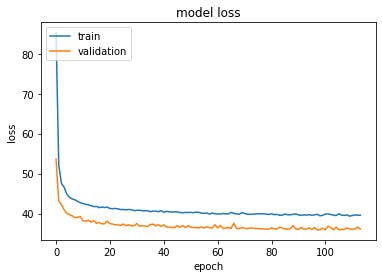

In [29]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
# evaluate the model
scores = model.evaluate(train_X, train_y)
scores

100/100 [==============================] - 0s 1ms/step - loss: 38.9376


38.937591552734375

In [31]:
# Making predict on new data
df_test = pd.read_csv("https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/all/Income_testing.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              800 non-null    int64
 1   age             800 non-null    int64
 2   yearsEducation  800 non-null    int64
 3   sex1M0F         800 non-null    int64
dtypes: int64(4)
memory usage: 25.1 KB


In [32]:
df_test.head()

,ID,age,yearsEducation,sex1M0F
0,1,36,20,0
1,2,38,17,0
2,3,24,10,0
3,4,39,12,1
4,5,50,12,0


In [34]:
test_X = df_test.drop(columns=["ID"])

In [35]:
test_y_predictions = model.predict(test_X)

In [36]:
test_y_predictions[:10]

array([[20.776037],
       [21.177572],
       [10.547922],
       [18.97673 ],
       [15.293896],
       [20.074963],
       [18.779615],
       [19.258009],
       [12.902645],
       [15.219203]], dtype=float32)